<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/TUGAS_1_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JAWABAN SOAL UTS PEMBELAJARAN MESIN OLEH NUROCHMAN

Install paket library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounting gdrive untuk upload data agar tidak berulang meng-upload data di google colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Membaca data file csv dengan menggunakan library pandas kemudian menampilkan 10 baris data.

In [5]:
data=pd.read_csv('/content/drive/MyDrive/SupplyDataset.csv', encoding='latin1' )
data.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


**JAWABAN SOALA 1.a. TOTAL DATA AWAL KOLOM ASA 54 DAN BARIS ADA 180519**

Mengecek property data ; jumlah data dan tipe data tiap variabel

In [6]:
data.shape

(180519, 53)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**DATA YANG DIAMBIL UNTUK DIANALISA 10011 BARIS SESUAI 5 DIGIT TERAKHIR NIP**

In [8]:
data=data.iloc[0:10011]
data.shape

(10011, 53)

**JAWABAN SOAL 1.b JUMLAH MISSING VALUE**

Mengecek missing value di dataset

In [9]:
data.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       0
Customer Password                    0
Customer Segment                     0
Customer State                       0
Customer Street                      0
Customer Zipcode                     0
Department Id                        0
Department Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order City               

**JAWABAN SOAL 1.c HANDLING MISSING VALUE**

Variabel Customer Order Zipcode (8728) dan Product Description (10011) ada data null. Variabel Order Zipcode dan Product Description dihapus karena terlalau banya missing value.

In [10]:
data.drop('Product Description',axis=1, inplace=True)
data.drop('Order Zipcode', axis=1, inplace=True)

Sudah tidak ada missing value

In [10]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

Memeriksa apa ada data duplikasi. Jika hasil "False" berarti tidak ada duplikasi data di dataset.

In [11]:
data.duplicated().any()

False

**JAWABAN SOAL 1.d PENGGABUNGAN NAMA DEPAN DAN NAMA BELAKANG**

Menggabungkan kolom 'Customer Fname' dan 'Customer Lname menjadi kolom 'Customer Full Name'

In [12]:
data[['Customer Fname','Customer Lname']].head()

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks


In [13]:
data['Customer Full Name'] = data['Customer Fname'].astype(str)+data['Customer Lname'].astype(str)

In [14]:
data['Customer Full Name'].head()

0       CallyHolloway
1           IreneLuna
2    GillianMaldonado
3            TanaTate
4       OrliHendricks
Name: Customer Full Name, dtype: object

Drop kolom 'Customer Fname' dan 'Customer Lname' karena sudah ada kolom  'Customer Full Name'

In [15]:
data.drop(columns=['Customer Fname','Customer Lname'], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           10011 non-null  object 
 1   Days for shipping (real)       10011 non-null  int64  
 2   Days for shipment (scheduled)  10011 non-null  int64  
 3   Benefit per order              10011 non-null  float64
 4   Sales per customer             10011 non-null  float64
 5   Delivery Status                10011 non-null  object 
 6   Late_delivery_risk             10011 non-null  int64  
 7   Category Id                    10011 non-null  int64  
 8   Category Name                  10011 non-null  object 
 9   Customer City                  10011 non-null  object 
 10  Customer Country               10011 non-null  object 
 11  Customer Email                 10011 non-null  object 
 12  Customer Id                    10011 non-null 

***JABAWAN SOLA 1.e DIAGRAM BATANG VARIABEL 'Delivery Status' ***

In [17]:
data['Delivery Status'].value_counts()

Delivery Status
Late delivery        5375
Advance shipping     2545
Shipping on time     1747
Shipping canceled     344
Name: count, dtype: int64

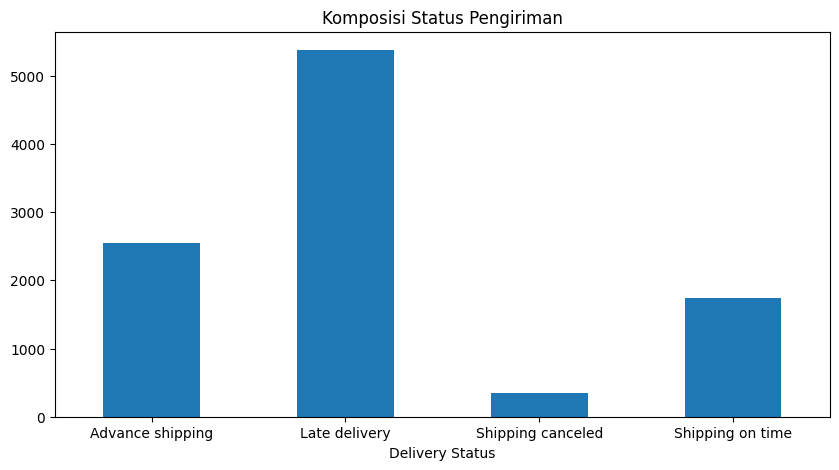

In [18]:
plt.figure(figsize=(10,5))
data['Delivery Status'].value_counts().sort_index().plot.bar(rot=0, title='Komposisi Status Pengiriman')
plt.show()

**JAWABAN SOAL 1.f  TRANFORMASI Delivery Status MENJADI BARIABEL BARU DENGAN NAMA Late Delivery YANG BERSKALA 1 (Late Delivery)  DAN 0 (Advance shipping, Shipping On Time, Shipping Canceled)**

In [19]:
data['Delivery Status'].value_counts()

Delivery Status
Late delivery        5375
Advance shipping     2545
Shipping on time     1747
Shipping canceled     344
Name: count, dtype: int64

**Setting "Late delivery' jadi 1 dan yang lain 0. Artinya jika variabel Late Delivery menjadi target untuk klasifikasi maka akan dibuat model untuk prediksi apakah order bisa telat atau tidak pengirimannya.**

In [20]:
data['Late Delivery']=np.where(data['Delivery Status'] == 'Late delivery', 1, 0)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,Late Delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks,0


**Kolom Delivery Status didrop karena sudah tidak terpakai**

In [21]:
data.drop('Delivery Status', axis=1, inplace = True)

In [22]:
data.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,Late Delivery
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,...,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,1


**JAWABAN SOAL 1.g MENGHITUG DAN MENAMPILKAN DIAGRAM PROPORSI MASING - MASING TYPE PEMBAYARAN**

In [23]:
data['Type'].value_counts()

Type
DEBIT       4340
TRANSFER    2105
PAYMENT     1889
CASH        1677
Name: count, dtype: int64

In [24]:
Total_transaksi = data['Type'].value_counts().sum()
print(Total_transaksi)

10011


In [25]:
Presentase_tiap_transaksi = data['Type'].value_counts()/Total_transaksi*100
print(Presentase_tiap_transaksi)

Type
DEBIT       43.352312
TRANSFER    21.026870
PAYMENT     18.869244
CASH        16.751573
Name: count, dtype: float64


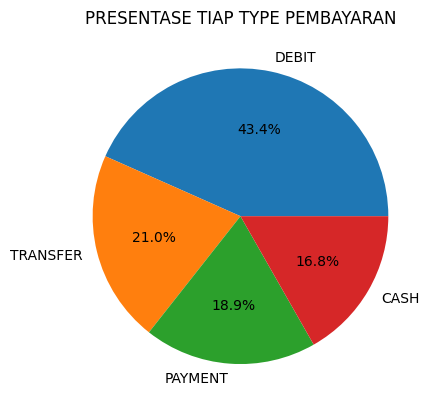

In [26]:
plt.pie(Presentase_tiap_transaksi, labels=Presentase_tiap_transaksi.index, autopct='%1.1f%%')
plt.title('PRESENTASE TIAP TYPE PEMBAYARAN')
plt.show()

**JAWABAN SOAL 1.h VARIABEL YANG DIHAPUS**

Di awal sudah menghapus **5 variabel**
'Product Description', Order Zipcode',Customer Fname', 'Custmer Lname', dan 'Delivery Status'

Grouping variabel kategori

In [27]:
cats=['Type','Category Name','Customer City','Customer Country','Customer Email','Customer Password',
      'Customer Segment','Customer State','Customer Street','Department Name','Market','Order City','Order Country','order date (DateOrders)',
      'Order Region','Order State','Order Status','Product Image','Product Name','shipping date (DateOrders)','Shipping Mode','Customer Full Name']

Menampilkan deskriptif data ketegori

In [28]:
data[cats].describe()

,Type,Category Name,Customer City,Customer Country,Customer Email,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,...,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name
count,10011,10011,10011,10011,10011,10011,10011,10011,10011,10011,...,10011,10011,10011,10011,10011,10011,10011,10011,10011,10011
unique,4,41,543,2,1,1,3,42,3994,11,...,135,7112,23,766,9,87,87,7095,4,3471
top,DEBIT,Cleats,Caguas,EE. UU.,XXXXXXXXX,XXXXXXXXX,Consumer,PR,4388 Burning Goose Ridge,Apparel,...,Estados Unidos,8/2/2015 20:32,Western Europe,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,4/13/2017 9:10,Standard Class,MarySmith
freq,4340,1872,4413,5415,10011,10011,4745,4596,17,3340,...,1283,5,1430,333,3738,1869,1869,6,6639,1320


Dari tabel deskripsi **18 variabel** kategori di atas untuk variabel dengan jumlah unique lebih dari 10 akan didrop sehinggal total ada 23 variabel

In [29]:
data.drop(columns=['Late_delivery_risk','Customer Email','Customer Password','Product Image','Category Name',
                   'Customer City','Customer State','Customer Street','Department Name','Order Country',
                   'order date (DateOrders)','Order Region','Market','Order City','Order State','Product Name',
                   'shipping date (DateOrders)','Customer Full Name'], axis=1, inplace=True)

In [30]:
data.shape

(10011, 32)

Menampilkan deskriptif data numerik

In [31]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,Late Delivery
count,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,...,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.0,10011.000000
mean,3.709619,3.182399,21.216558,178.363140,26.359505,7136.938767,31641.274498,4.549096,28.328783,-82.699910,...,0.119493,2.445410,198.991587,178.363140,21.216558,557.880332,26.359505,119.956049,0.0,0.536909
std,1.514923,1.194683,106.283424,117.831659,17.021228,4614.849108,37134.765931,1.639870,9.886873,21.362880,...,0.462434,1.555465,131.080539,117.831659,106.283424,341.734682,17.021228,128.874889,0.0,0.498661
min,0.000000,0.000000,-3366.000000,8.470000,2.000000,1.000000,603.000000,2.000000,17.982491,-158.025986,...,-2.750000,1.000000,11.290000,8.470000,-3366.000000,24.000000,2.000000,11.290000,0.0,0.000000
25%,2.000000,2.000000,6.510000,98.000000,17.000000,3440.000000,725.000000,4.000000,18.254120,-96.698025,...,0.070000,1.000000,119.970001,98.000000,6.510000,365.000000,17.000000,50.000000,0.0,0.000000
50%,4.000000,4.000000,29.690001,149.380005,24.000000,6780.000000,10312.000000,4.000000,29.764603,-73.945229,...,0.270000,2.000000,159.960007,149.380005,29.690001,403.000000,24.000000,59.990002,0.0,1.000000
75%,5.000000,4.000000,63.150002,251.960007,29.000000,10103.000000,73505.000000,5.000000,38.117386,-66.370560,...,0.360000,4.000000,299.950012,251.960007,63.150002,642.000000,29.000000,129.990005,0.0,1.000000
max,6.000000,4.000000,614.250000,1470.000000,76.000000,20755.000000,98632.000000,12.000000,48.781933,115.049789,...,0.500000,5.000000,1500.000000,1470.000000,614.250000,1363.000000,76.000000,1500.000000,0.0,1.000000


**JAWABAN SOAL 1.i PENERAPAN LABEL DAN ORDINAL ENCODER**

Ada 5 variabel kategori yang dipakai 'Type','Customer Country','Customer Segment','Order Status','Shipping Mode'.

In [32]:
cats2=['Type','Customer Country','Customer Segment','Order Status','Shipping Mode']

In [33]:
data[cats2].describe()

,Type,Customer Country,Customer Segment,Order Status,Shipping Mode
count,10011,10011,10011,10011,10011
unique,4,2,3,9,4
top,DEBIT,EE. UU.,Consumer,COMPLETE,Standard Class
freq,4340,5415,4745,3738,6639


In [33]:
#Untuk variabel "Type" encoding yang tepat adalah One Hot Encoding namun untuk case ini dipakai Label Encoding agar simpel
data['Type'].value_counts()

Type
DEBIT       4340
TRANSFER    2105
PAYMENT     1889
CASH        1677
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
data['Type'] = le_type.fit_transform(data['Type'])
data['Type']

0        1
1        3
2        0
3        1
4        2
        ..
10006    3
10007    3
10008    3
10009    3
10010    3
Name: Type, Length: 10011, dtype: int64

In [35]:
#Untuk variabel "Customer Country" encoding yang tepat adalah Label Encoding karena hanya 2 jenis
data['Customer Country'].value_counts()

Customer Country
EE. UU.        5415
Puerto Rico    4596
Name: count, dtype: int64

In [36]:
le_CC = LabelEncoder()
data['Customer Country'] = le_CC.fit_transform(data['Customer Country'])
data['Customer Country']

0        1
1        1
2        0
3        0
4        1
        ..
10006    0
10007    0
10008    0
10009    0
10010    0
Name: Customer Country, Length: 10011, dtype: int64

In [37]:
#Untuk variabel "Customer Segment" encoding yang tepat adalah Ordinal Encoding sengan asumsi ada tingkat konsumen
data['Customer Segment'].value_counts()

Customer Segment
Consumer       4745
Corporate      3723
Home Office    1543
Name: count, dtype: int64

In [38]:
map_class={'Corporate':1,'Home Office':2,'Consumer':3}
data['Customer_Class']= data['Customer Segment'].map(map_class)

In [39]:
data[['Customer Segment','Customer_Class']].head(10)

,Customer Segment,Customer_Class
0,Consumer,3
1,Consumer,3
2,Consumer,3
3,Home Office,2
4,Corporate,1
5,Consumer,3
6,Home Office,2
7,Corporate,1
8,Corporate,1
9,Corporate,1


Kolom "Customer Segment" didrop karena sudah ada Customer_Class

In [40]:
data.drop('Customer Segment', axis=1, inplace=True)

In [41]:
#Untuk variabel "Order  Status" encoding yang tepat adalah Frequency Encoding namum dalam kasus ini dipakai label encoding agar simple
data['Order Status'].value_counts()

Order Status
COMPLETE           3738
PENDING_PAYMENT    1811
CLOSED             1677
PROCESSING          951
PENDING             810
ON_HOLD             602
SUSPECTED_FRAUD     194
CANCELED            150
PAYMENT_REVIEW       78
Name: count, dtype: int64

In [42]:
le_OS = LabelEncoder()
data['Order Status'] = le_OS.fit_transform(data['Order Status'])
data['Order Status']

0        2
1        5
2        1
3        2
4        6
        ..
10006    7
10007    7
10008    7
10009    7
10010    7
Name: Order Status, Length: 10011, dtype: int64

In [43]:
#Untuk variabel "Shipping Mode" encoding yang tepat adalah Ordinal Encoding sengan asumsi ada tingkat konsumen
data['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    6639
Second Class      2074
First Class       1155
Same Day           143
Name: count, dtype: int64

In [44]:
map_class={'Same Day':1,'First Class':2,'Second Class':3,'Standard Class':4 }
data['Shipping_Class']= data['Shipping Mode'].map(map_class)


In [45]:
data[['Shipping Mode','Shipping_Class']].head(10)

,Shipping Mode,Shipping_Class
0,Standard Class,4
1,Standard Class,4
2,Standard Class,4
3,Standard Class,4
4,Standard Class,4
5,Standard Class,4
6,First Class,2
7,First Class,2
8,Second Class,3
9,First Class,2


In [46]:
data.drop('Shipping Mode', axis=1, inplace=True)

In [47]:
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Country,Customer Id,Customer Zipcode,Department Id,...,Order Item Total,Order Profit Per Order,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Late Delivery,Customer_Class,Shipping_Class
0,1,3,4,91.250000,314.640015,73,1,20755,725.0,2,...,314.640015,91.250000,2,1360,73,327.75,0,0,3,4
1,3,5,4,-249.089996,311.359985,73,1,19492,725.0,2,...,311.359985,-249.089996,5,1360,73,327.75,0,1,3,4
2,0,4,4,-247.779999,309.720001,73,0,19491,95125.0,2,...,309.720001,-247.779999,1,1360,73,327.75,0,0,3,4
3,1,3,4,22.860001,304.809998,73,0,19490,90027.0,2,...,304.809998,22.860001,2,1360,73,327.75,0,0,2,4
4,2,2,4,134.210007,298.250000,73,1,19489,725.0,2,...,298.250000,134.210007,6,1360,73,327.75,0,0,1,4


**JAWABAN SOAL 1.j PENENTUAN PROPORSI DATA TRAINING DAN TESTING 75:25 DAN 80:20**

In [48]:
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

In [49]:
X=data.drop(['Late Delivery'], axis = 1)
Y=data['Late Delivery']

In [50]:
scale = StandardScaler().fit_transform(X)
cols = list(X.columns)
X = pd.DataFrame(scale, columns=cols)
X.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Country,Customer Id,Customer Zipcode,Department Id,...,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Customer_Class,Shipping_Class
0,-0.441235,-0.468443,0.684401,0.658964,1.156596,2.740274,1.085448,2.951070,-0.832584,-1.554528,...,0.982334,1.156596,0.658964,-0.645203,2.347317,2.740274,1.61245,0.0,0.982368,0.638997
1,1.556597,0.851822,0.684401,-2.543389,1.128759,2.740274,1.085448,2.677374,-0.832584,-1.554528,...,0.982334,1.128759,-2.543389,0.702883,2.347317,2.740274,1.61245,0.0,0.982368,0.638997
2,-1.440151,0.191690,0.684401,-2.531063,1.114840,2.740274,-0.921278,2.677158,1.709635,-1.554528,...,0.982334,1.114840,-2.531063,-1.094565,2.347317,2.740274,1.61245,0.0,0.982368,0.638997
3,-0.441235,-0.468443,0.684401,0.015464,1.073168,2.740274,-0.921278,2.676941,1.572344,-1.554528,...,0.982334,1.073168,0.015464,-0.645203,2.347317,2.740274,1.61245,0.0,-0.111690,0.638997
4,0.557681,-1.128575,0.684401,1.063186,1.017493,2.740274,1.085448,2.676724,-0.832584,-1.554528,...,0.982334,1.017493,1.063186,1.152245,2.347317,2.740274,1.61245,0.0,-1.205748,0.638997


In [51]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.25, random_state=42)
#training 75%
#tsting 25%

In [52]:
model_logreg1 = LogisticRegression(solver='liblinear', class_weight='balanced')
model_logreg1.fit(X_train1, Y_train1)
Y1_pred = model_logreg1.predict(X_test1)

In [53]:
print('Test set Accuracy: %.4f' % accuracy_score(Y_test1, Y1_pred))

Test set Accuracy: 0.9832


In [54]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.20, random_state=42)
#training 80%
#tsting 20%

In [55]:
model_logreg2 = LogisticRegression(solver='liblinear', class_weight='balanced')
model_logreg2.fit(X_train2, Y_train2)
Y2_pred = model_logreg2.predict(X_test2)

In [56]:
print('Test set Accuracy: %.4f' % accuracy_score(Y_test2, Y2_pred))

Test set Accuracy: 0.9835


**JAWABAN SOAL NOMOR 2 PEBANDINGAN NILAI CONFUSSION MATIX MENGGUNAKAN F1 SCORE**

Nilai confussion matrix dengan F1 Score antara training spilt 75:25 dengan 80:20 adalah sama yaitu 98.48%

In [58]:
#CONFUSSION MATRIX
print('F1 score', f1_score (Y_test1, Y1_pred))

F1 score 0.9848046309696092


In [57]:
#CONFUSSION MATRIX
print('F1 score', f1_score (Y_test2, Y2_pred))

F1 score 0.9847996315062183


**JAWABAN SOAL NOMOR 3 PENERAPAN DECISSION TREE**

SKEMA TRAINING 75% DAN TEST 25%

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_dtree1 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model_dtree1.fit(X_train1, Y_train1)
model_dtree1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [60]:
Y_pred1 = model_dtree1.predict(X_test1)

In [62]:
print(Y_pred1 [0:5])
print(Y_test1 [0:5])


[1 0 1 1 0]
7784    1
9059    0
568     1
9013    1
2236    0
Name: Late Delivery, dtype: int64


**EVALUASI DENGAN NILAI ACCURACY SCORE**

In [68]:
print('Akurasi Decision Tree 1 : ', accuracy_score(Y_test1, Y_pred1))

Akurasi Decision Tree 1 :  0.9532560926887734


SKEMA TRAINING 80% DAN TESTING 20%

In [64]:
model_dtree2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model_dtree2.fit(X_train2, Y_train2)
model_dtree2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
Y_pred2 = model_dtree2.predict(X_test2)

In [66]:
print(Y_pred2 [0:5])
print(Y_test2 [0:5])

[1 0 1 1 0]
7784    1
9059    0
568     1
9013    1
2236    0
Name: Late Delivery, dtype: int64


In [67]:
print('Akurasi Decision Tree 2: ', accuracy_score(Y_test2, Y_pred2))

Akurasi Decision Tree 2:  0.9555666500249625


**JAWABAN SOAL NOMOR 3 PENERAPAN RANDOM FOREST**

SKEMA TRAINING 75% DAN TESTING 25%

In [69]:
model_rf1 = RandomForestClassifier(n_estimators=80, criterion='entropy')
model_rf1.fit(X_train1, Y_train1)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [70]:
Y_1pred = model_rf1.predict(X_test1)

In [71]:
from sklearn import metrics
print('Akurasi Random Forest1 :', metrics.accuracy_score(Y_test1, Y_1pred))

Akurasi Random Forest1 : 0.9920095884938074


SKEMA TRAINING 80 % DAN TESTING 20%

In [72]:
model_rf2 = RandomForestClassifier(n_estimators=80, criterion='entropy')
model_rf2.fit(X_train2, Y_train2)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [73]:
Y_2pred = model_rf2.predict(X_test2)

In [74]:
print('Akurasi Random Forest2 :', metrics.accuracy_score(Y_test2, Y_2pred))

Akurasi Random Forest2 : 0.9945082376435347


KESIMPULAN DARI KETIGA ALGORITMA YANG DIGUNAKAN MAKA RANDOM FOREST MENGHASILKAN AKURASI PREDIKSI YANG PALING BAIK, YG KEDUA YAITU REGRESI LOGISTIK DAN YANG TERAKHIR ADALAH DECISSION TREE